In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

| Variable | Description|
| :------- | :------: | 
| price | price in US dollars (\$326--\$18,823) | 
| carat | weight of the diamond (0.2--5.01) | 
| cut | quality of the cut (Fair, Good, Very Good, Premium, Ideal) |
| color | diamond colour, from J (worst) to D (best) |
| clarity | a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) |
| x | length in mm (0--10.74) |
| y | width in mm (0--58.9) |
| z | depth in mm (0--31.8) |
| depth | total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) |
| table | width of top of diamond relative to widest point (43--95) |

In [137]:
data = pd.read_csv('diamonds.csv')

In [138]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [96]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [97]:
data.shape

(53940, 11)

In [98]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [99]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [100]:
data = data.replace(r'^\s*$', np.nan, regex=True)

In [101]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [102]:
data.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [103]:
#data.cut.nunique()
data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [104]:
#data.color.nunique()
data.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [105]:
data.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [135]:
res = pd.crosstab(data['cut'], data['color'])
print(res)

color     0     1     2     3     4     5    6
cut                                           
0       163   224   312   314   303   175  119
1       662   933   909   871   702   522  307
2      2834  3903  3826  4884  3115  2093  896
3      1603  2337  2331  2924  2360  1428  808
4      1513  2400  2164  2299  1824  1204  678


In [136]:
res = pd.crosstab(data['color'], data['cut'])
print(res)

cut      0    1     2     3     4
color                            
0      163  662  2834  1603  1513
1      224  933  3903  2337  2400
2      312  909  3826  2331  2164
3      314  871  4884  2924  2299
4      303  702  3115  2360  1824
5      175  522  2093  1428  1204
6      119  307   896   808   678


In [106]:
def my_sum(x):
    return x.sum()

In [107]:
# Group prices by 'cut' and calculate the mean price
price_per_cut = pd.crosstab(
    index=data['cut'],              # Rows will be the main categories
    columns='Sum Price per cut',        # Name for the new column in the resulting DataFrame
    values=data['price'],             # The values to aggregate
    aggfunc=my_sum                # The aggregation function (e.g., mean, sum, median)
)
print("\nTotal prices grouped by cut:")
print(price_per_cut)


Total prices grouped by cut:
col_0      Sum Price per cut
cut                         
Fair                 7017600
Good                19275009
Ideal               74513487
Premium             63221498
Very Good           48107623


In [108]:
price_per_cut = data.groupby('cut')['price'].sum().reset_index()

print("\nPrices grouped by Category (using groupby):")
print(price_per_cut)


Prices grouped by Category (using groupby):
         cut     price
0       Fair   7017600
1       Good  19275009
2      Ideal  74513487
3    Premium  63221498
4  Very Good  48107623


In [109]:
# Group prices by 'color' and calculate the mean price
price_per_color = pd.crosstab(
    index=data['color'],              # Rows will be the main categories
    columns='Sum Price per color',        # Name for the new column in the resulting DataFrame
    values=data['price'],             # The values to aggregate
    aggfunc=my_sum                # The aggregation function (e.g., mean, sum, median)
)
print("\nTotal prices grouped by color:")
print(price_per_color)


Total prices grouped by color:
col_0  Sum Price per color
color                     
D                 21476439
E                 30142944
F                 35542866
G                 45158240
H                 37257301
I                 27608146
J                 14949281


In [110]:
# Group prices by 'clarity' and calculate the mean price
price_per_clarity = pd.crosstab(
    index=data['clarity'],              # Rows will be the main categories
    columns='Sum Price per clarity',        # Name for the new column in the resulting DataFrame
    values=data['price'],             # The values to aggregate
    aggfunc=my_sum                # The aggregation function (e.g., mean, sum, median)
)
print("\nTotal prices grouped by clarity:")
print(price_per_clarity)


Total prices grouped by clarity:
col_0    Sum Price per clarity
clarity                       
I1                     2907809
IF                     5128062
SI1                   52207755
SI2                   46549485
VS1                   31372190
VS2                   48112520
VVS1                   9221984
VVS2                  16635412


#### From above analysis, if someone will purchase a diamond of premium cut,"G" color and SI1 clarity, they will get best diamond

<Axes: xlabel='cut', ylabel='price'>

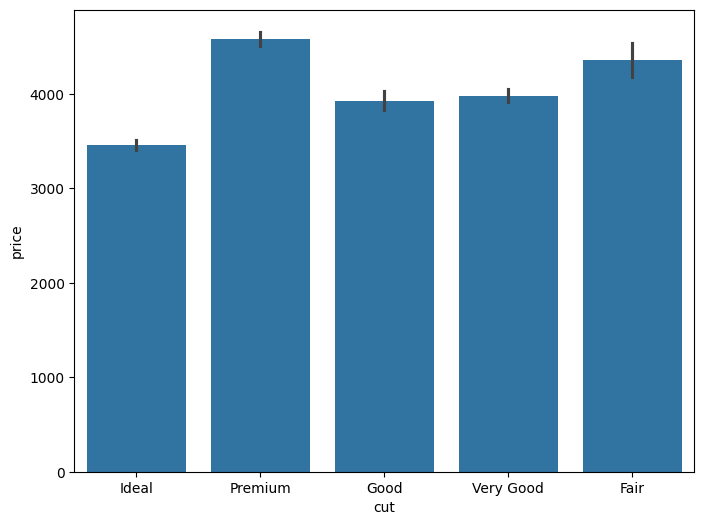

In [111]:
plt.figure(figsize=(8,6))
sns.barplot(x="cut", y="price", data=data)

<Axes: xlabel='color', ylabel='price'>

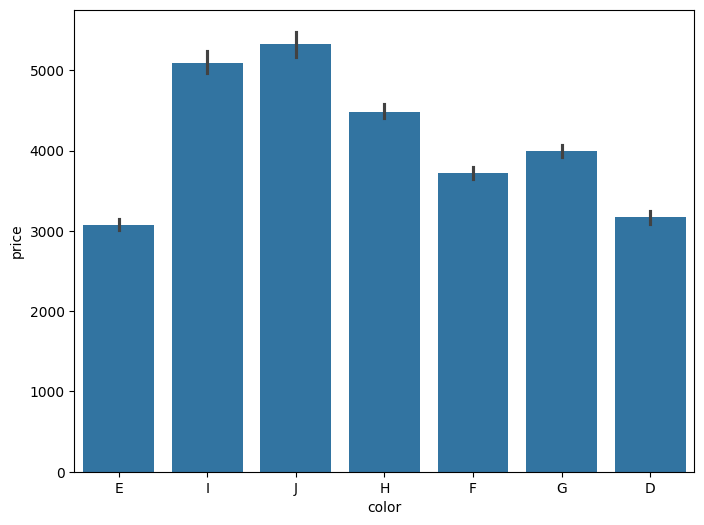

In [112]:
plt.figure(figsize=(8,6))
sns.barplot(x="color", y="price", data=data)

<Axes: xlabel='clarity', ylabel='price'>

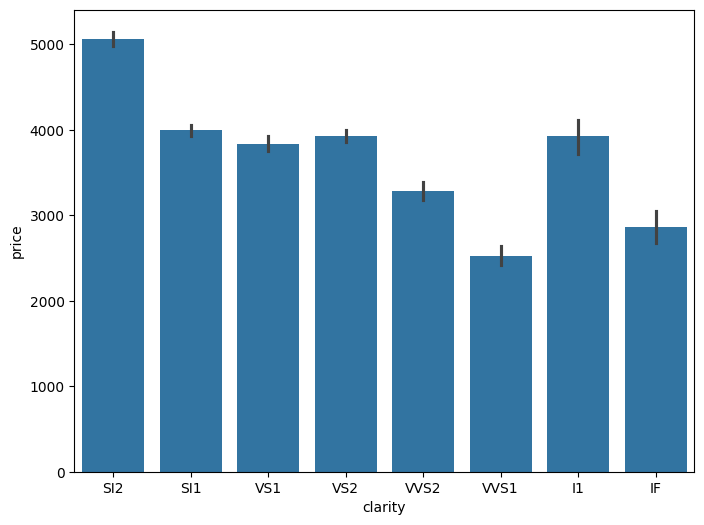

In [113]:
plt.figure(figsize=(8,6))
sns.barplot(x="clarity", y="price", data=data)

<Axes: xlabel='color', ylabel='count'>

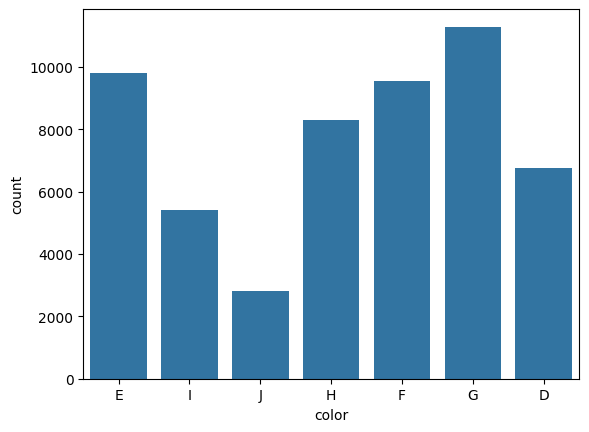

In [114]:
sns.countplot(x="color",data=data)

<Axes: xlabel='cut', ylabel='count'>

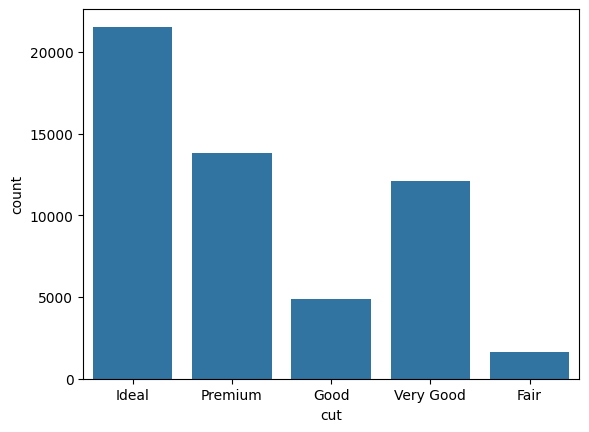

In [115]:
sns.countplot(x="cut",data=data)

<Axes: xlabel='clarity', ylabel='count'>

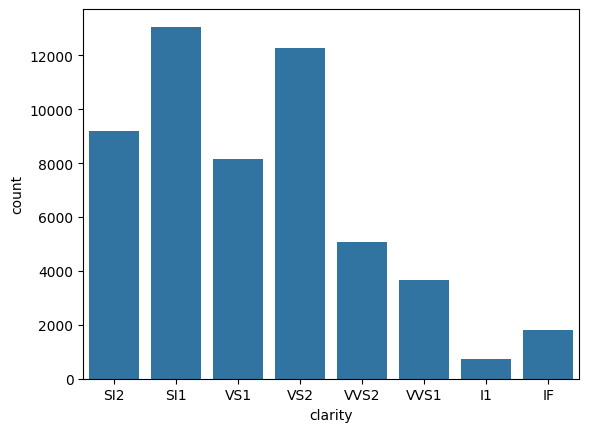

In [116]:
sns.countplot(x="clarity",data=data)

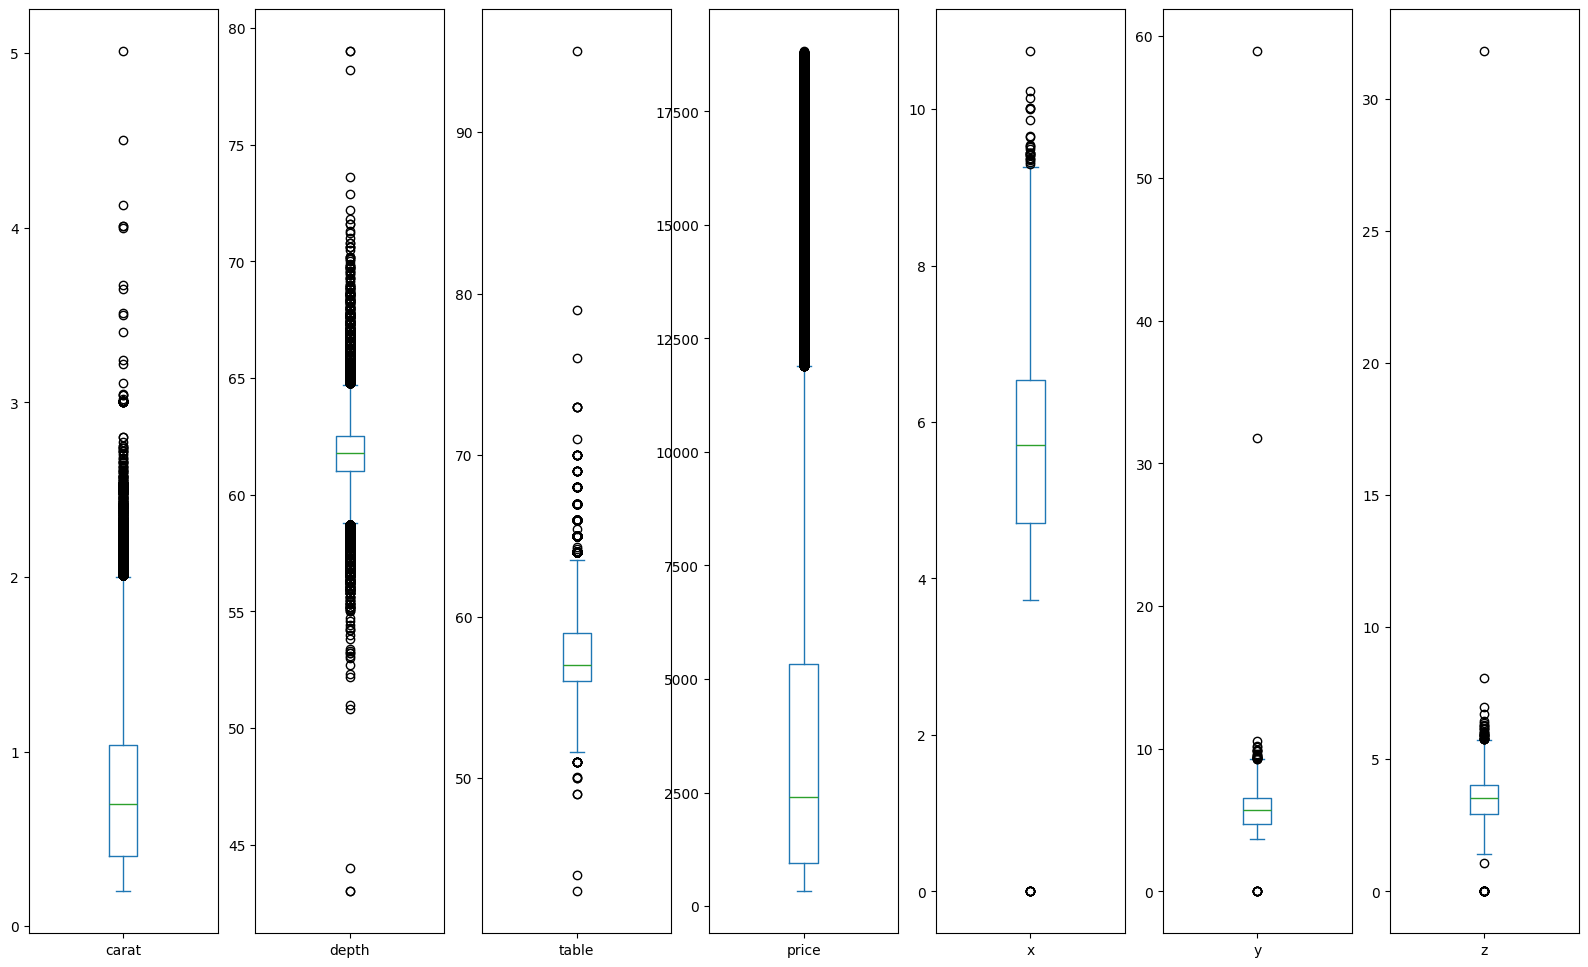

In [117]:
data.plot(kind="box",subplots=True,figsize=(20,12))
plt.show()

In [118]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in ["cut", "color", "clarity"]:
    data[col] = le.fit_transform(data[col])

In [119]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


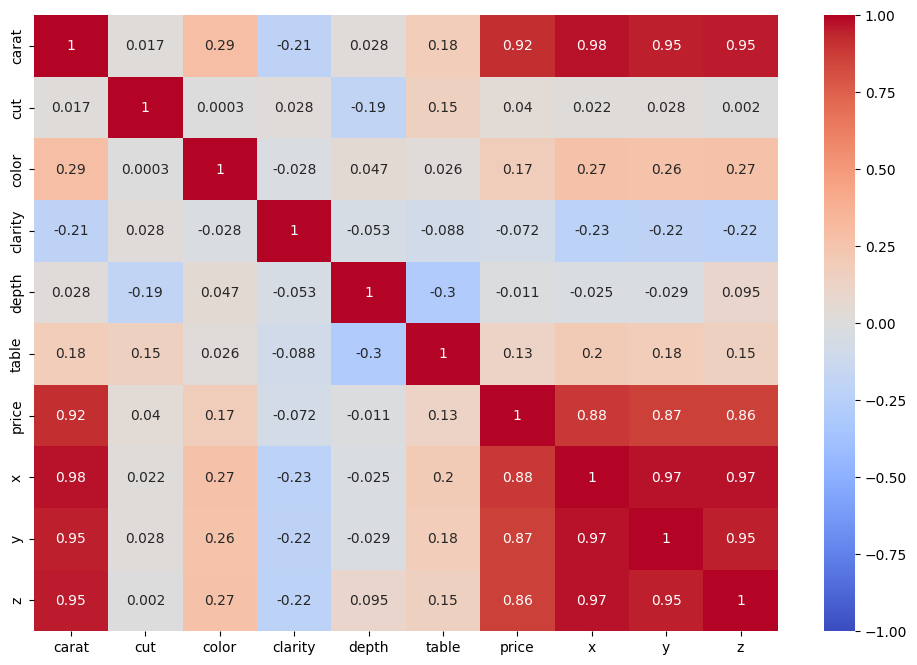

In [120]:
plt.figure(figsize=(12, 8))
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, vmin=-1, cmap='coolwarm')
plt.show()

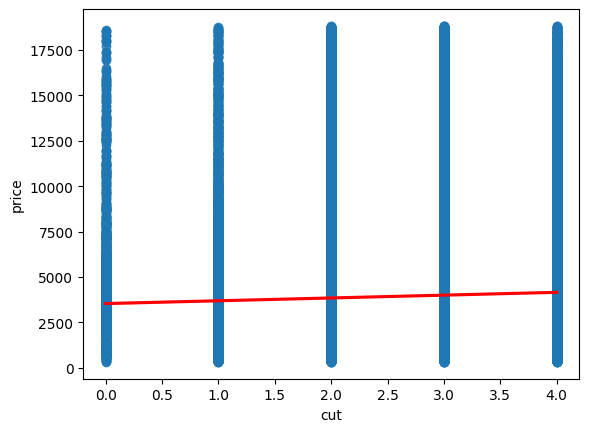

In [121]:
sns.regplot(x="cut",
            y="price",
            data=data,
            line_kws = {'color':'red'},
            order=1)
plt.show()

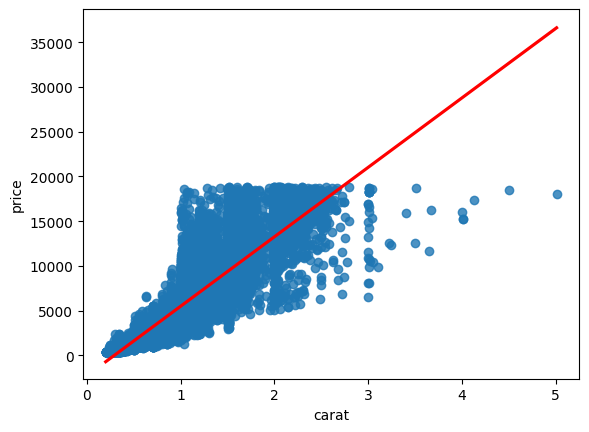

In [122]:
sns.regplot(x="carat",
            y="price",
            data=data,
            line_kws = {'color':'red'},
            order=1)
plt.show()

In [123]:
# Import sklearn Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [124]:
# Features (X) and Target (y)
X = data.drop("price", axis=1)
y = data["price"]

In [125]:
# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (43152, 9)
Testing samples: (10788, 9)


In [126]:
# Base Random Forest Model
rf = RandomForestRegressor()
rf.fit(X_train, y_train) #training my model
y_pred_base = rf.predict(X_test) #prediction

print("\n===== BASE MODEL PERFORMANCE =====")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_base)))
print("R² Score:", r2_score(y_test, y_pred_base))


===== BASE MODEL PERFORMANCE =====
RMSE: 542.1905078680297
R² Score: 0.9815075895691777


In [127]:
# Hyperparameter Tuning (GridSearchCV)
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}
grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

In [128]:
grid.fit(X_train, y_train)

print("\n===== BEST PARAMETERS =====")
print(grid.best_params_)

best_model = grid.best_estimator_


Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\hp\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\miniconda3\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\hp\miniconda3\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validat


===== BEST PARAMETERS =====
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [129]:
# Evaluate HyperTuned Model
y_pred_best = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print("\n===== TUNED MODEL PERFORMANCE =====")
print("Tuned Model RMSE:", rmse)
print("Tuned Model R² Score:", r2)


===== TUNED MODEL PERFORMANCE =====
Tuned Model RMSE: 595.7978108662179
Tuned Model R² Score: 0.9776700623755921


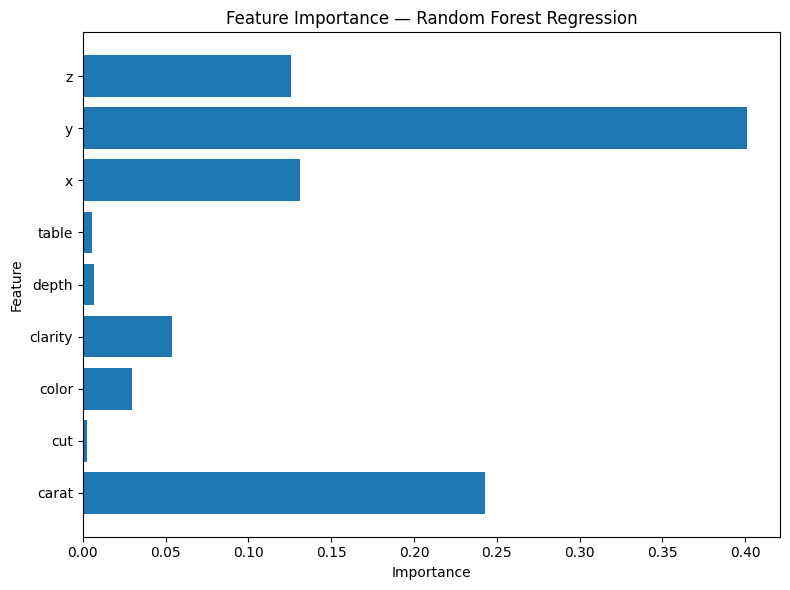

In [131]:
# Feature Importance Plot
importances = best_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance — Random Forest Regression")
plt.tight_layout()
plt.show()